Corrélations Mid historique → mates_mean selon la taille de la fenêtre :
Fenêtre 1 parties précédentes : Corrélation = 0.160
Fenêtre 2 parties précédentes : Corrélation = 0.181
Fenêtre 3 parties précédentes : Corrélation = 0.126
Fenêtre 4 parties précédentes : Corrélation = 0.161
Fenêtre 5 parties précédentes : Corrélation = 0.139
Fenêtre 6 parties précédentes : Corrélation = 0.227
Fenêtre 7 parties précédentes : Corrélation = 0.238
Fenêtre 8 parties précédentes : Corrélation = 0.228
Fenêtre 9 parties précédentes : Corrélation = 0.205


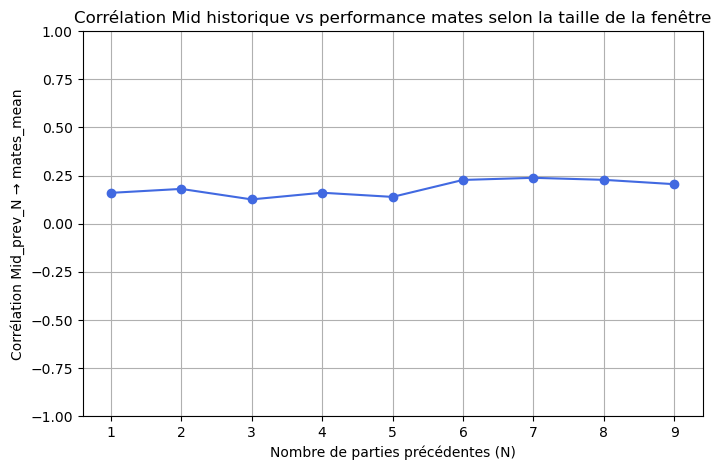


La fenêtre la plus significative est 7 parties précédentes avec une corrélation de 0.238


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Charger le CSV
df = pd.read_csv("data.csv")

# Colonnes
my_role = 'Mid'
other_roles = ['Top', 'Jungle', 'Bot']

# Moyenne des mates pour chaque partie
df['mates_mean'] = df[other_roles].mean(axis=1)

# Fenêtres à tester
max_window = 9
window_results = {}

for window in range(1, max_window + 1):
    # Moyenne glissante du Mid sur les N parties précédentes
    df[f'Mid_prev_{window}'] = df[my_role].shift(1).rolling(window=window).mean()
    
    # Supprimer les lignes NA
    valid_df = df.dropna(subset=[f'Mid_prev_{window}', 'mates_mean'])
    
    # Calcul de la corrélation
    corr = valid_df[f'Mid_prev_{window}'].corr(valid_df['mates_mean'])
    window_results[window] = corr

# Afficher les résultats
print("Corrélations Mid historique → mates_mean selon la taille de la fenêtre :")
for window, corr in window_results.items():
    print(f"Fenêtre {window} parties précédentes : Corrélation = {corr:.3f}")

# Visualiser la corrélation selon la fenêtre
plt.figure(figsize=(8,5))
plt.plot(list(window_results.keys()), list(window_results.values()), marker='o', color='royalblue')
plt.title("Corrélation Mid historique vs performance mates selon la taille de la fenêtre")
plt.xlabel("Nombre de parties précédentes (N)")
plt.ylabel("Corrélation Mid_prev_N → mates_mean")
plt.ylim(-1,1)
plt.grid(True)
plt.show()

# Identifier la fenêtre la plus significative (corrélation absolue maximale)
best_window = max(window_results, key=lambda k: abs(window_results[k]))
print(f"\nLa fenêtre la plus significative est {best_window} parties précédentes avec une corrélation de {window_results[best_window]:.3f}")


In [14]:
df['Mid_prev_7'] = df['Mid'].shift(1).rolling(window=7).mean()

df['Mid_prev_7_cat'] = pd.cut(df['Mid_prev_7'], bins=[-np.inf, -0.3, 0.3, np.inf],
                              labels=['mauvais', 'neutre', 'bon'])


In [16]:
mates_by_cat = df.groupby('Mid_prev_7_cat')['mates_mean'].mean()
mates_by_cat_std = df.groupby('Mid_prev_7_cat')['mates_mean'].std()

print("Performance moyenne des mates selon catégorie Mid_prev_7 :")
print(mates_by_cat)

Performance moyenne des mates selon catégorie Mid_prev_7 :
Mid_prev_7_cat
mauvais   -3.333333e-01
neutre    -1.851852e-01
bon        9.796086e-18
Name: mates_mean, dtype: float64


C:\Users\Rafael\AppData\Local\Temp\ipykernel_16440\3208794971.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mates_by_cat = df.groupby('Mid_prev_7_cat')['mates_mean'].mean()
C:\Users\Rafael\AppData\Local\Temp\ipykernel_16440\3208794971.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mates_by_cat_std = df.groupby('Mid_prev_7_cat')['mates_mean'].std()


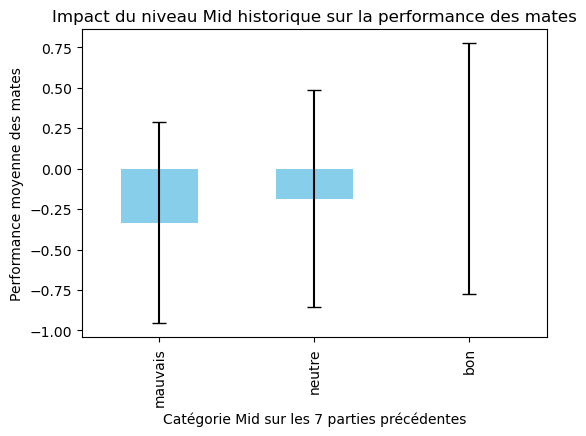

In [17]:
plt.figure(figsize=(6,4))
mates_by_cat.plot(kind='bar', yerr=mates_by_cat_std, color='skyblue', capsize=5)
plt.ylabel("Performance moyenne des mates")
plt.xlabel("Catégorie Mid sur les 7 parties précédentes")
plt.title("Impact du niveau Mid historique sur la performance des mates")
plt.show()


(merci chatgpt)

# Interprétation des résultats

## Catégorie « mauvais » (-0.333)
Quand ton niveau Mid sur les 7 parties précédentes est plutôt faible, la moyenne des performances de tes coéquipiers sur la partie suivante tend à être **négative**.  
Cela suggère que jouer mal sur la série précédente pourrait être associé à des coéquipiers moins performants.

## Catégorie « neutre » (-0.185)
Quand ton niveau Mid est moyen, la moyenne des coéquipiers est légèrement négative, mais moins que pour la catégorie « mauvais ».  
Tes coéquipiers ne sont pas aussi impactés que dans le scénario « mauvais ».

## Catégorie « bon » (~0)
Quand ton niveau Mid est bon sur les 7 parties précédentes, la moyenne des mates est proche de zéro.  
Cela signifie qu’un bon Mid ne crée pas de coéquipiers « négatifs » et peut être associé à des mates plus équilibrés ou légèrement meilleurs.

---

## Conclusions principales

- **Impact moyen** : Plus ton Mid est faible sur les 7 parties précédentes, plus il semble que tes coéquipiers aient tendance à moins bien jouer.
- **Fenêtre de 7 parties** : La corrélation que tu as calculée précédemment montre que cette période est celle où ton niveau Mid influence le plus tes coéquipiers.
- **Bonnes performances passées** : Elles n’augmentent pas drastiquement la performance des mates, mais elles empêchent un effet négatif.

💡 **Remarque** : la moyenne « bon » proche de 0 suggère un **plafond d’effet** — ton niveau Mid peut réduire l’impact négatif mais n’augmente pas énormément la performance des coéquipiers.
